## CAPSTONE PROJECT - CLUSTERING

#### IMPORT PACKAGES

In [ ]:
# import package
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import statistics
from scipy.stats import chi2
from matplotlib import patches
warnings.filterwarnings('ignore')

# Package untuk visualisasi
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#### READ DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/Dataset_Project Mandiri/Data/marketing.csv',encoding='ISO-8859-1', delimiter=';')
df.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546,172,88
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6,2,6
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127,111,42
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20,10,5
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118,46,15


#### PROBLEM STATEMENT

-Perusahaan ingin melakukan campaign terhadap produk yang mereka sediakan sehingga perusahaan ingin melakukan analisis segmen terhadap pelanggan mana yang paling memungkinkan untuk membeli produk dan memasarkannya kepada segmen tertentu

-Profile dari pelanggan

#### EDA DAN  DATA PRE-PROCESSING

In [ ]:
df['usia']=2023-df['tahun_lahir']

In [ ]:
age25below =df.usia[(df.usia <= 25) & (df.usia>=12)]
age26_35 = df.usia[(df.usia <= 35) & (df.usia>= 26)]
age36_45 = df.usia[(df.usia <= 45) & (df.usia>= 36)]
age46_55 = df.usia[(df.usia <= 55) & (df.usia>=46)]
age55above = df.usia[df.usia >= 56]


In [ ]:
Pendapatan1=df.Pendapatan[(df.Pendapatan <= 40000) & (df.Pendapatan >= 0)]
Pendapatan2=df.Pendapatan[(df.Pendapatan <= 80000) & (df.Pendapatan >= 40000)]
Pendapatan3=df.Pendapatan[(df.Pendapatan <= 100000) & (df.Pendapatan >= 80000)]
Pendapatan4=df.Pendapatan[(df.Pendapatan >= 100000)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   tahun_lahir          2240 non-null   int64  
 2   Pendidikan           2240 non-null   object 
 3   Status_pernikahan    2240 non-null   object 
 4   Pendapatan           2216 non-null   float64
 5   jumlah_anak          2240 non-null   int64  
 6   jumlah_remaja        2240 non-null   int64  
 7   tanggal_pendaftaran  2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   Spent_wine           2240 non-null   int64  
 10  Spent_buah           2240 non-null   int64  
 11  Spent_daging         2240 non-null   int64  
 12  Spent_ikan           2240 non-null   int64  
 13  Spent_emas           2240 non-null   int64  
 14  usia                 2240 non-null   int64  
dtypes: float64(1), int64(11), object(3)
me

In [ ]:
df.describe()

,ID,tahun_lahir,Pendapatan,jumlah_anak,jumlah_remaja,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,usia
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,5583.023161,1968.889646,51862.889646,0.443233,0.505450,49.070391,305.979564,26.357402,164.416894,37.616712,43.620799,54.110354
std,3247.130374,11.706431,21132.649556,0.537298,0.543615,28.905996,337.754563,39.768593,215.295072,54.624930,50.941149,11.706431
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
25%,2814.250000,1959.000000,35265.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,9.000000,46.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,176.000000,8.000000,68.000000,12.000000,24.000000,53.000000
75%,8417.500000,1977.000000,68445.750000,1.000000,1.000000,74.000000,507.000000,33.000000,231.750000,50.000000,56.000000,64.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,262.000000,83.000000


In [ ]:
categorical = ["Pendidikan", "Status_pernikahan"]

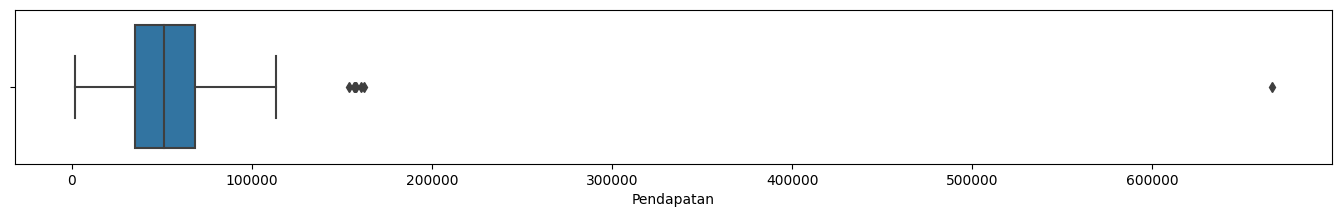

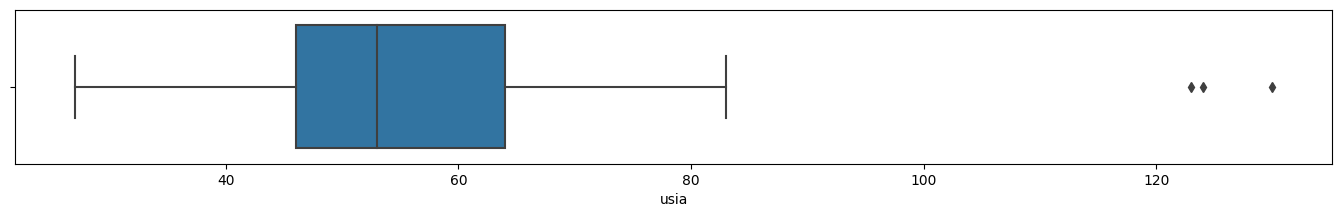

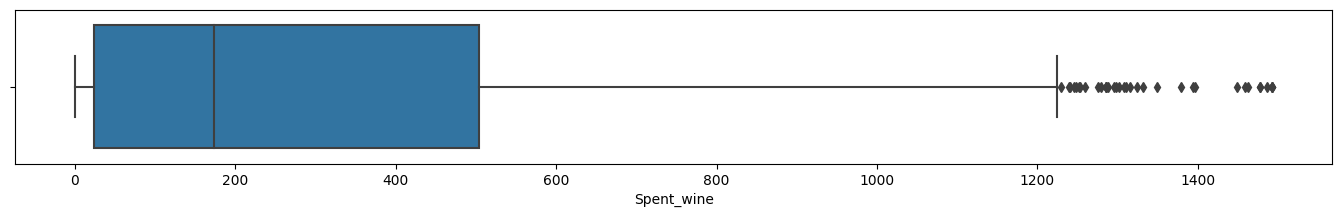

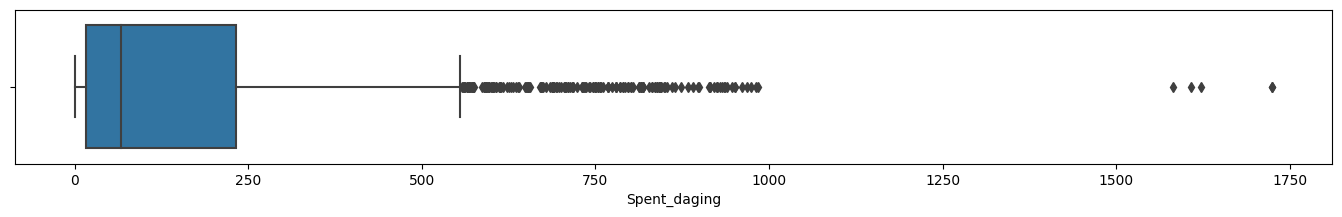

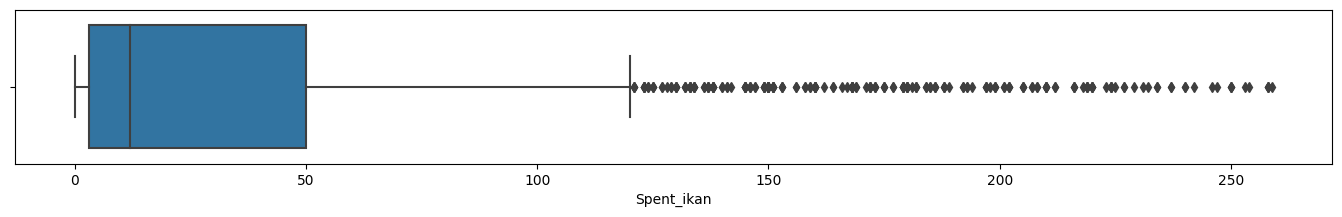

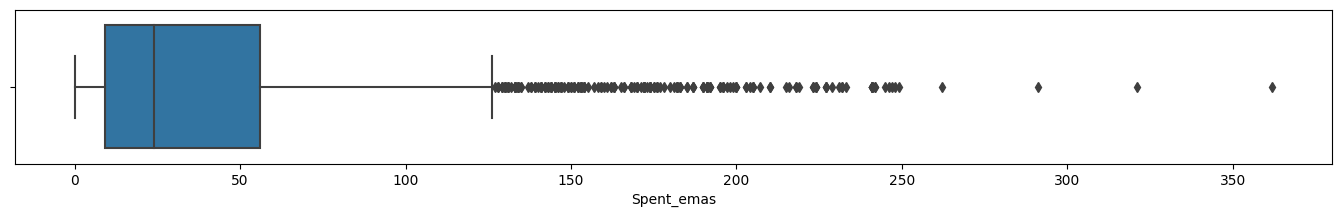

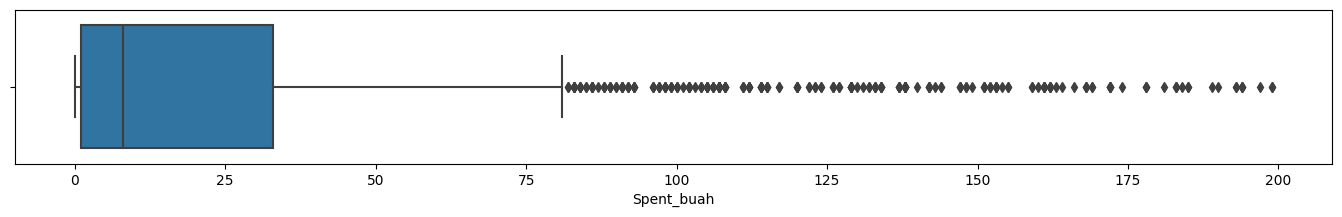

In [ ]:
numerical = ['Pendapatan','usia','Spent_wine', 'Spent_daging', 'Spent_ikan', 'Spent_emas', 'Spent_buah']
for column in numerical:
        plt.figure(figsize=(17,2))
        sns.boxplot(data=df, x=column)

In [ ]:
df.isnull().sum()

ID                      0
tahun_lahir             0
Pendidikan              0
Status_pernikahan       0
Pendapatan             24
jumlah_anak             0
jumlah_remaja           0
tanggal_pendaftaran     0
recency                 0
Spent_wine              0
Spent_buah              0
Spent_daging            0
Spent_ikan              0
Spent_emas              0
usia                    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in range(0, len(df['Status_pernikahan'])):
    if df['Status_pernikahan'][i] == 'Absurd':
        df['Status_pernikahan'][i] = np.nan
    elif df['Status_pernikahan'][i] == 'Alone':
        df['Status_pernikahan'][i] = 'Single'
    elif df['Status_pernikahan'][i] == 'YOLO':
        df['Status_pernikahan'][i] = np.nan

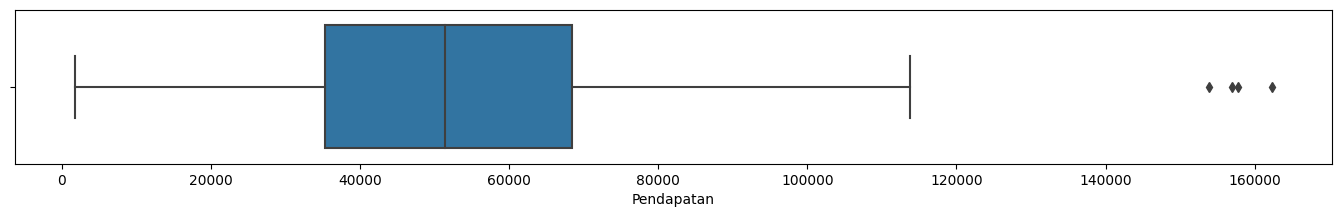

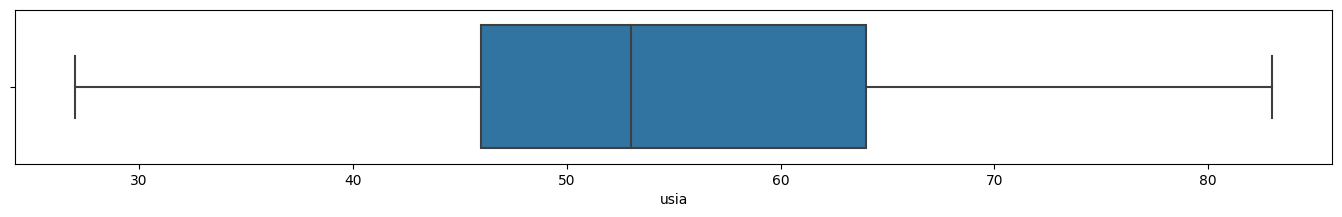

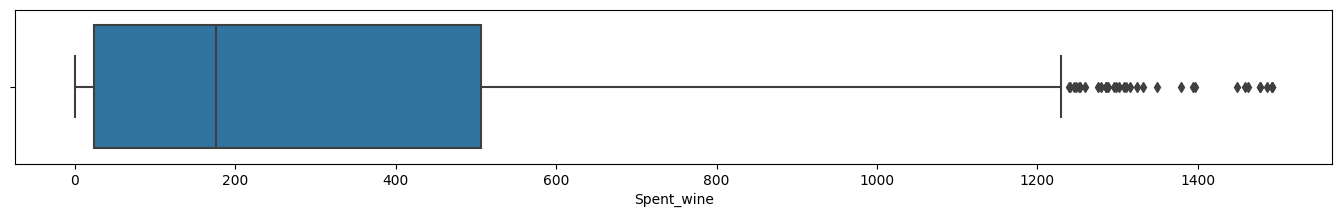

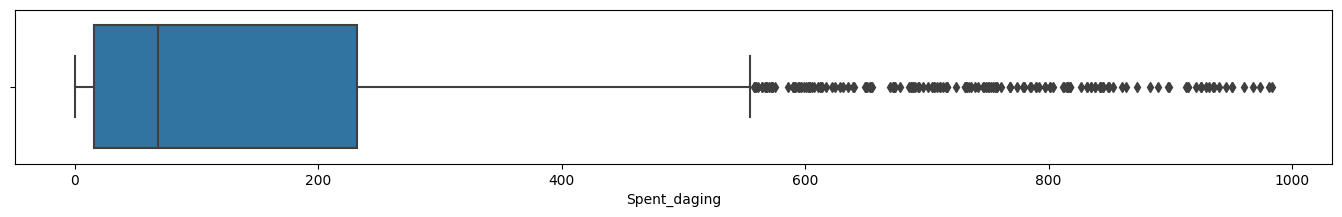

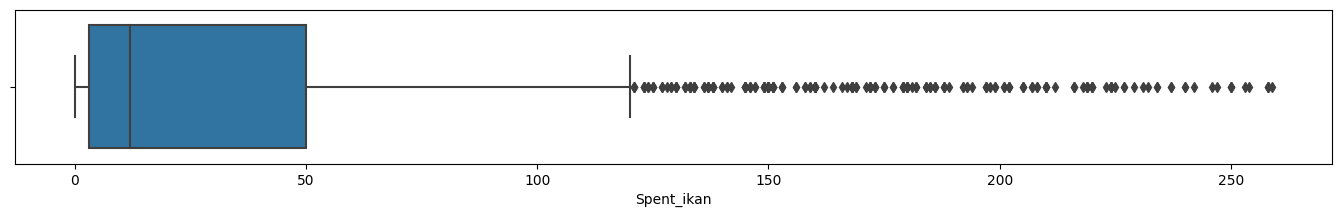

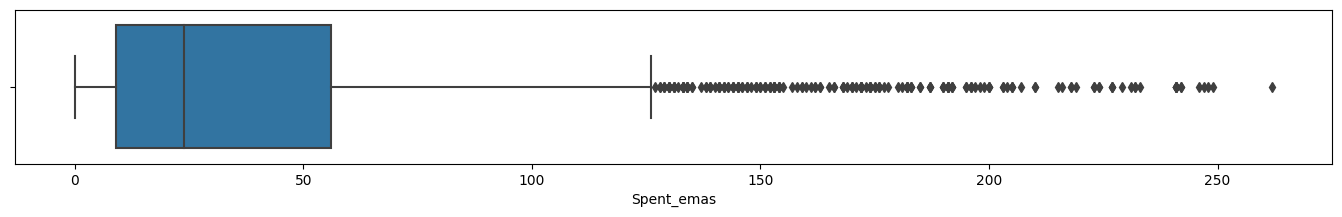

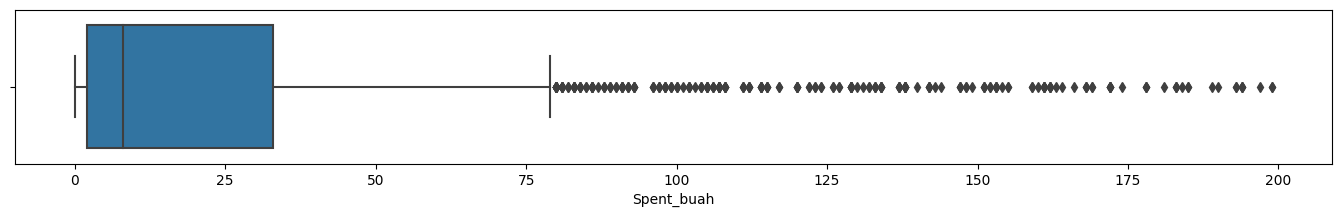

In [ ]:
for i in range (0,len(df['usia'])):
  if df['usia'].iloc[i]> 100:
    df['usia'].iloc[i] =np.nan
for i in range (0,len(df['Pendapatan'])):
  if df['Pendapatan'].iloc[i]> 600000:
    df['Pendapatan'].iloc[i] =np.nan
for i in range (0,len(df['Spent_daging'])):
  if df['Spent_daging'].iloc[i]> 1500:
    df['Spent_daging'].iloc[i] =np.nan
for i in range (0,len(df['Spent_emas'])):
  if df['Spent_emas'].iloc[i]> 270:
    df['Spent_emas'].iloc[i] =np.nan
df.dropna(inplace=True)

for column in numerical:
        plt.figure(figsize=(17,2))
        sns.boxplot(data=df, x=column)

In [ ]:
def handler(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data:
        if i<lwr_bound :
          data[data==i]=np.nan
        if i>upr_bound :
          data[data==i]=np.nan

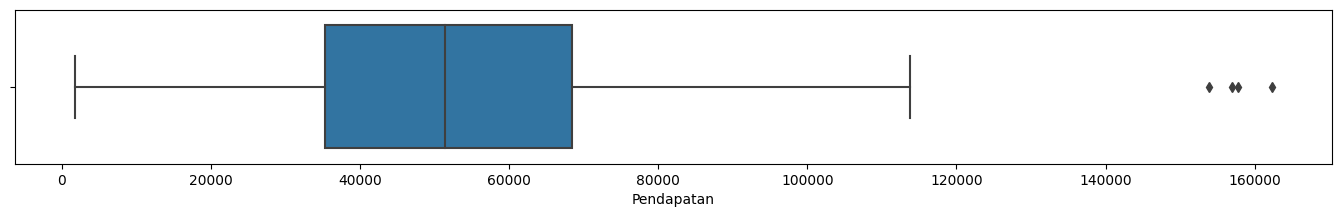

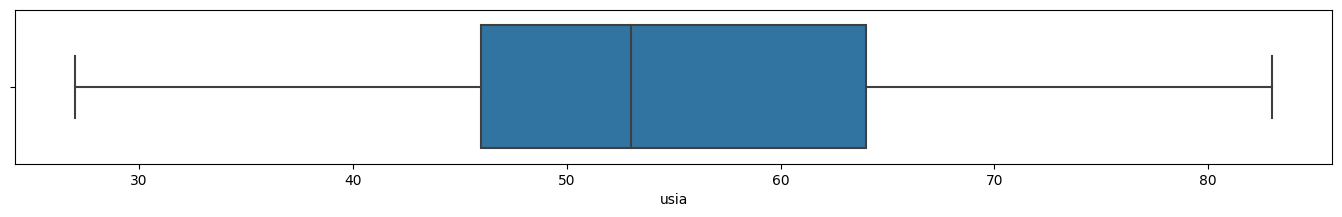

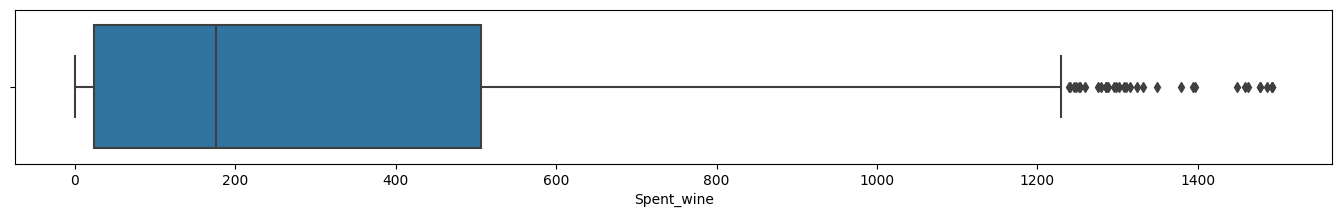

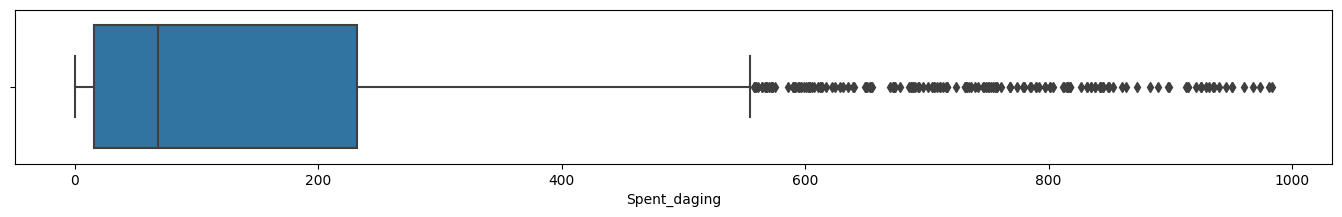

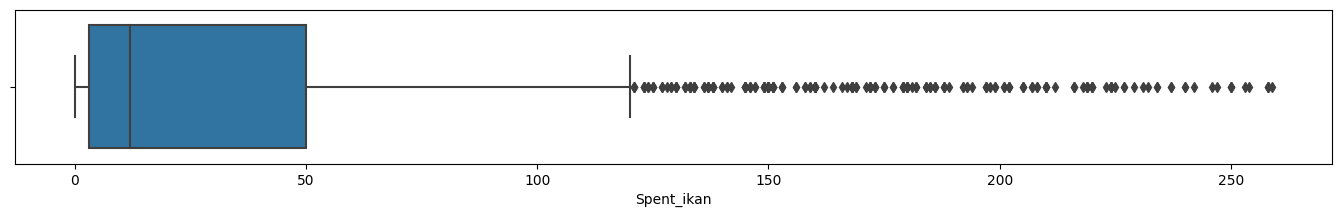

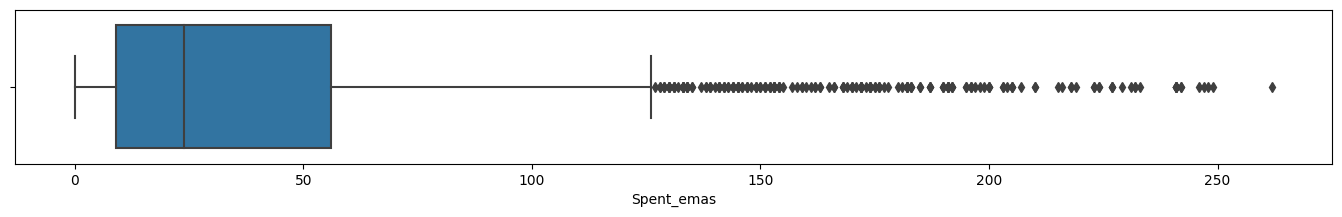

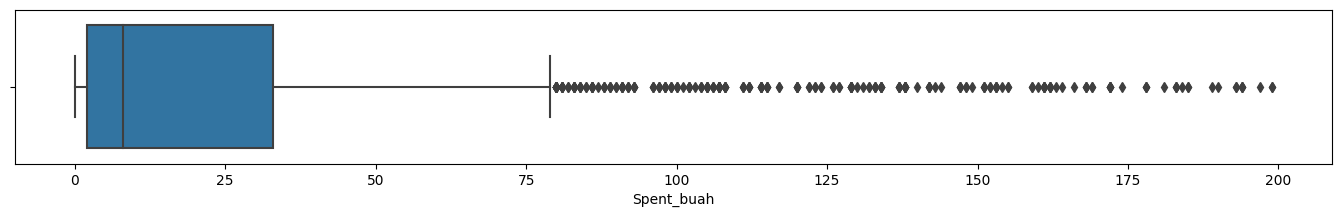

In [ ]:
handler(df['Pendapatan'])
handler(df['usia'])
handler(df['Spent_wine'])
handler(df['Spent_daging'])
handler(df['Spent_ikan'])
handler(df['Spent_emas'])
handler(df['Spent_buah'])

df.isnull().sum()
df.dropna(inplace = True)

for column in numerical:
        plt.figure(figsize=(17,2))
        sns.boxplot(data=df, x=column)

In [ ]:
df.reset_index(inplace = True,drop = True)

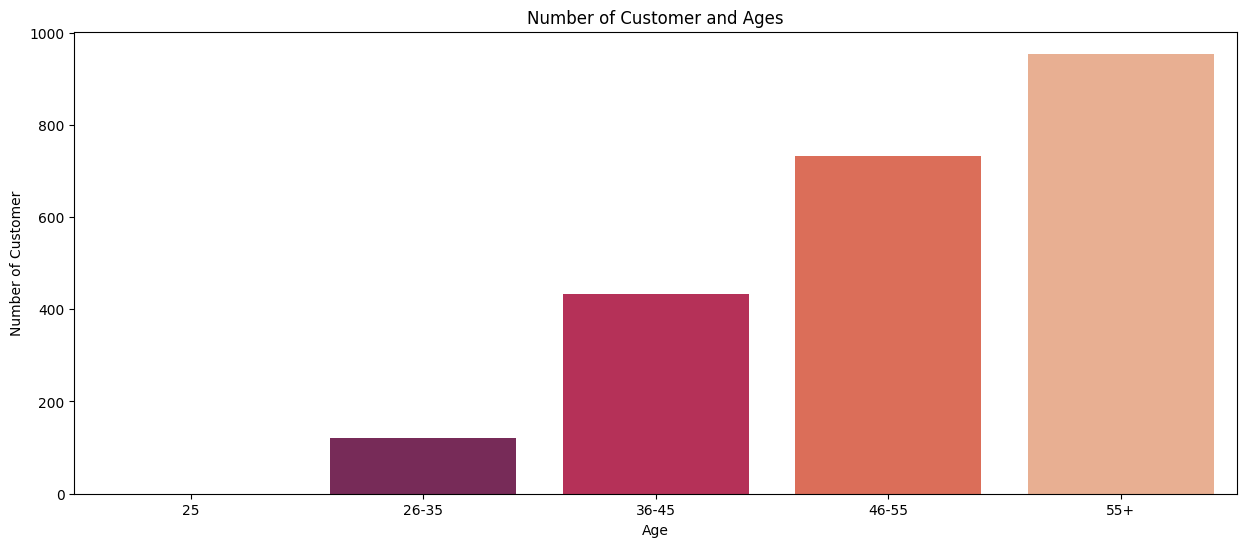

In [ ]:
x = ["25","26-35","36-45","46-55","55+"]
y = [len(age25below.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

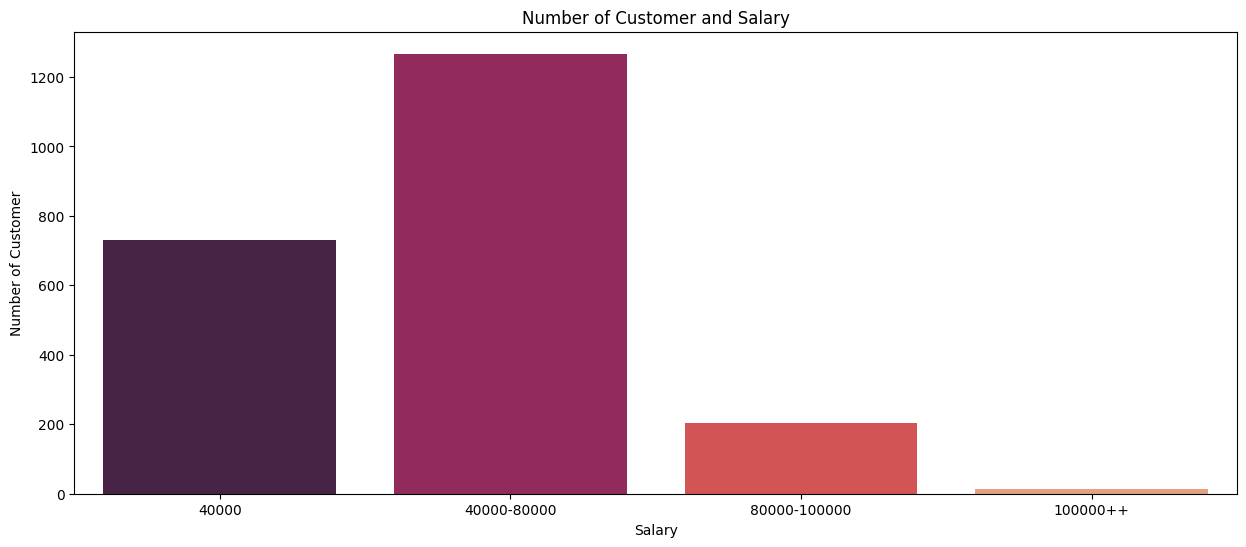

In [ ]:
x = ["40000","40000-80000","80000-100000","100000++"]
y = [len(Pendapatan1.values),len(Pendapatan2.values),len(Pendapatan3.values),len(Pendapatan4.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Customer")
plt.show()

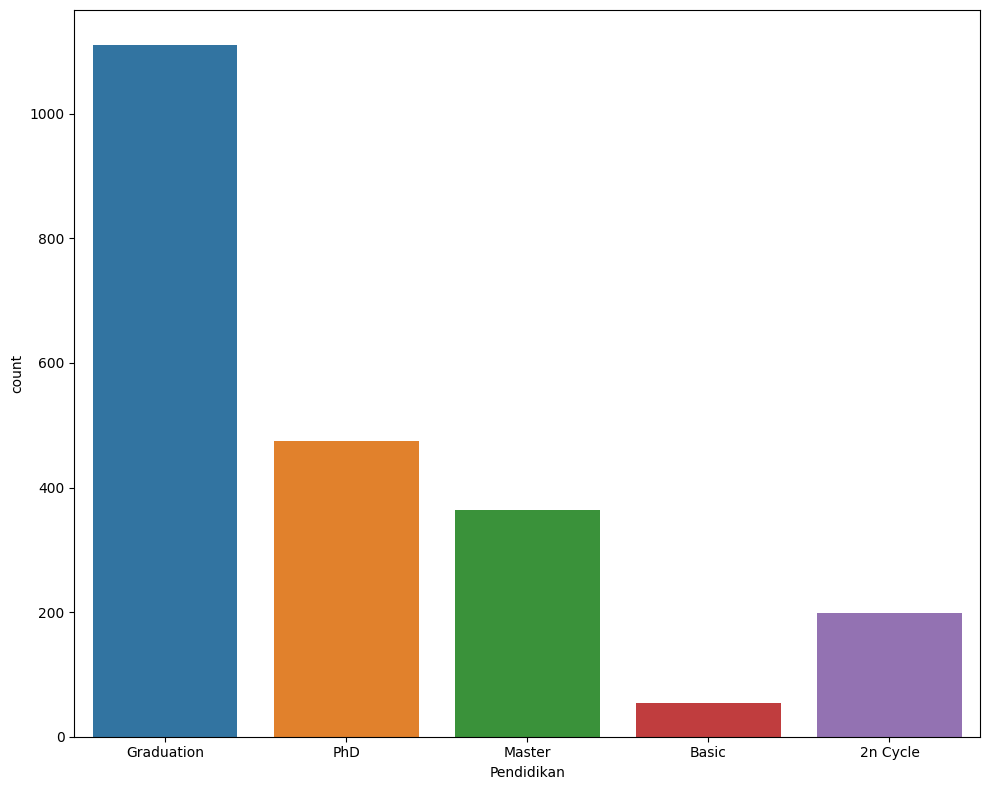

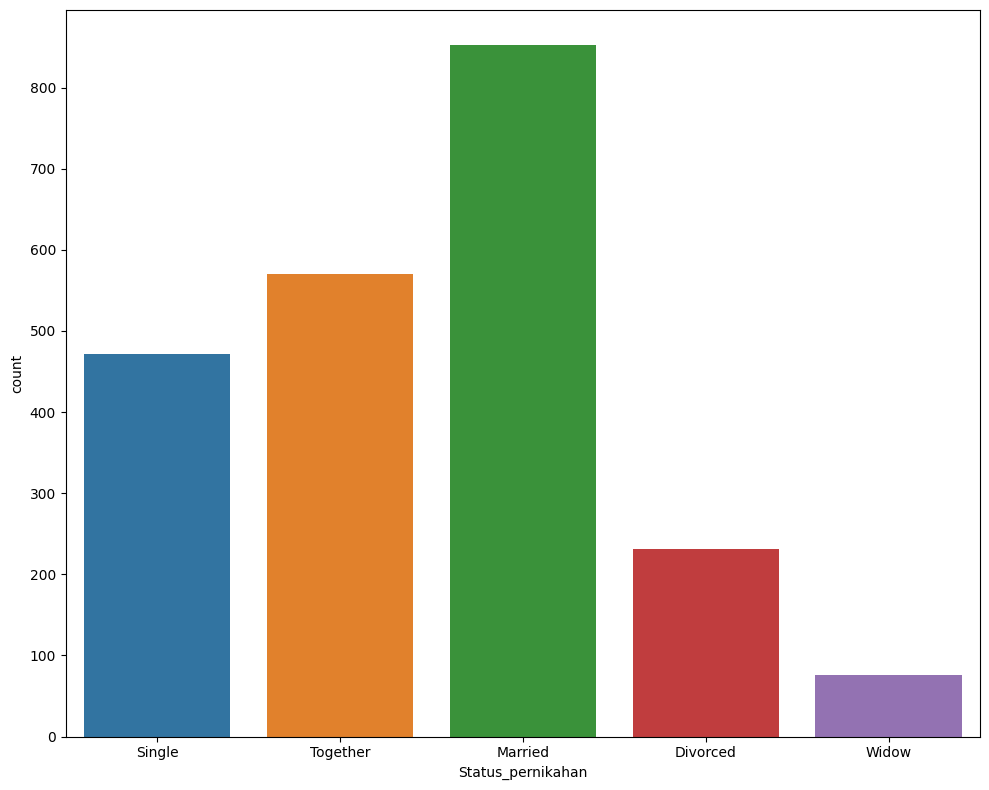

In [ ]:
for col in categorical:
    plt.figure(figsize=(10,8))
    sns.countplot(x=col, data=df)
    plt.tight_layout()

In [ ]:
df.isnull().sum()

ID                     0
tahun_lahir            0
Pendidikan             0
Status_pernikahan      0
Pendapatan             0
jumlah_anak            0
jumlah_remaja          0
tanggal_pendaftaran    0
recency                0
Spent_wine             0
Spent_buah             0
Spent_daging           0
Spent_ikan             0
Spent_emas             0
usia                   0
dtype: int64

In [ ]:
df.shape

(2202, 15)

In [ ]:
label_encoder = LabelEncoder()
encoded_data = df[categorical].apply(label_encoder.fit_transform)

In [ ]:
cluster_data = pd.concat([encoded_data, df[['ID',"usia","Pendapatan","Spent_wine","Spent_buah","Spent_daging","Spent_ikan","Spent_emas","jumlah_anak","jumlah_remaja","recency"]]], axis=1)
cluster_data.head()

,Pendidikan,Status_pernikahan,ID,usia,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,jumlah_anak,jumlah_remaja,recency
0,2,2,5524,66.0,58138.0,635,88,546.0,172,88.0,0,0,58
1,2,2,2174,69.0,46344.0,11,1,6.0,2,6.0,1,1,38
2,2,3,4141,58.0,71613.0,426,49,127.0,111,42.0,0,0,26
3,2,3,6182,39.0,26646.0,11,4,20.0,10,5.0,1,0,26
4,4,1,5324,42.0,58293.0,173,43,118.0,46,15.0,1,0,94


#### FEATURE ENGINEERING

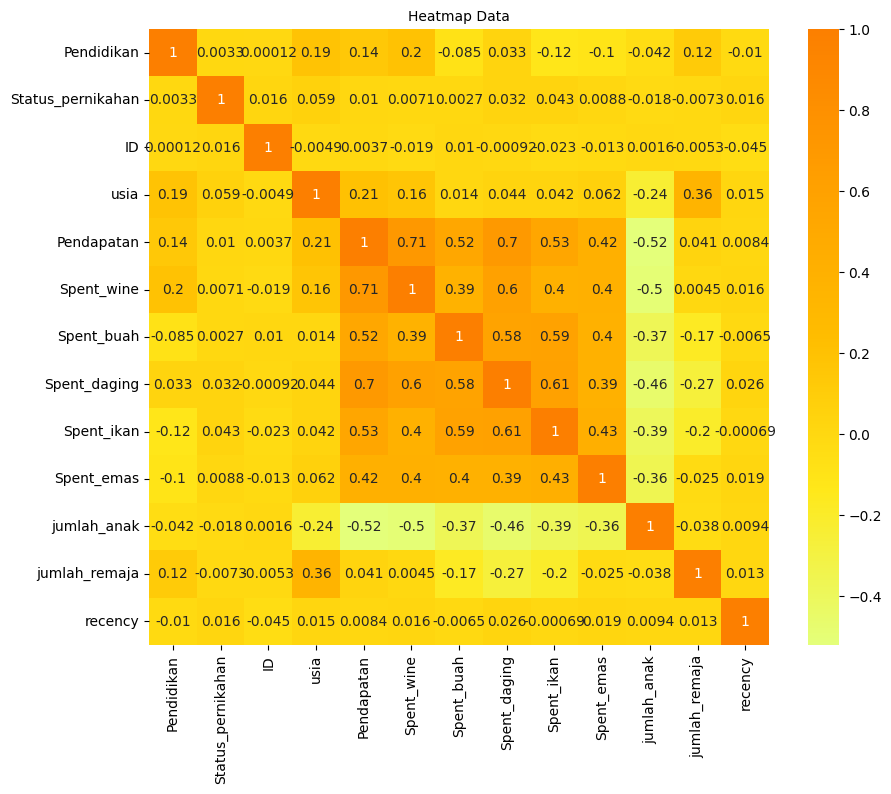

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cluster_data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 10)
plt.show()

In [ ]:
cluster_data = cluster_data.drop(["ID","Pendidikan","Status_pernikahan","usia","jumlah_remaja","recency","jumlah_anak"], axis = 1)
cluster_data.head()

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,58138.0,635,88,546.0,172,88.0
1,46344.0,11,1,6.0,2,6.0
2,71613.0,426,49,127.0,111,42.0
3,26646.0,11,4,20.0,10,5.0
4,58293.0,173,43,118.0,46,15.0


#### MODELING

In [ ]:
scaler = StandardScaler()
cluster_data[["Pendapatan","Spent_wine","Spent_buah","Spent_daging","Spent_ikan","Spent_emas"]] = scaler.fit_transform(cluster_data[["Pendapatan","Spent_wine","Spent_buah","Spent_daging","Spent_ikan","Spent_emas"]])
cluster_data

,Pendapatan,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas
0,0.297007,0.974362,1.550384,1.772775,2.460668,0.871384
1,-0.261214,-0.873553,-0.637769,-0.735980,-0.652171,-0.738683
2,0.934790,0.355429,0.569488,-0.173833,1.343708,-0.031824
3,-1.193538,-0.873553,-0.562315,-0.670938,-0.505685,-0.758318
4,0.304343,-0.393806,0.418581,-0.215646,0.153505,-0.561968
...,...,...,...,...,...,...
2197,0.443022,1.193506,0.418581,0.081688,0.080262,3.993341
2198,0.575123,0.296201,-0.662920,-0.624480,-0.688793,-0.699413
2199,0.242245,1.782825,0.544337,0.244293,-0.102847,-0.385254
2200,0.822711,0.361352,0.091616,0.230355,0.776073,0.341240


In [ ]:
df_wine = cluster_data.drop(columns = ['Spent_buah','Spent_daging','Spent_ikan','Spent_emas'])
df_daging = cluster_data.drop(columns = ['Spent_buah','Spent_wine','Spent_ikan','Spent_emas'])
df_buah = cluster_data.drop(columns = ['Spent_daging','Spent_wine','Spent_ikan','Spent_emas'])
df_emas = cluster_data.drop(columns = ['Spent_buah','Spent_wine','Spent_ikan','Spent_daging'])
df_ikan = cluster_data.drop(columns = ['Spent_buah','Spent_wine','Spent_daging','Spent_emas'])

In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_wine)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_wine, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5571955214212846
For n_clusters = 3, silhouette score is 0.5041647626477491
For n_clusters = 4, silhouette score is 0.42941159182370003
For n_clusters = 5, silhouette score is 0.4187942551928491
For n_clusters = 6, silhouette score is 0.4016273718383366
For n_clusters = 7, silhouette score is 0.39304676138038536
For n_clusters = 8, silhouette score is 0.4009319501199737
For n_clusters = 9, silhouette score is 0.4020383202388906


In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_buah)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_buah, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5218570441897793
For n_clusters = 3, silhouette score is 0.5039485140680358
For n_clusters = 4, silhouette score is 0.4448173078516054
For n_clusters = 5, silhouette score is 0.43841978863260583
For n_clusters = 6, silhouette score is 0.40803754719209184
For n_clusters = 7, silhouette score is 0.4200775444982603
For n_clusters = 8, silhouette score is 0.40239593318433126
For n_clusters = 9, silhouette score is 0.4045238023630028


In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_daging)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_daging, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5667415457128576
For n_clusters = 3, silhouette score is 0.5036853873651687
For n_clusters = 4, silhouette score is 0.4663311568724983
For n_clusters = 5, silhouette score is 0.4360726181390537
For n_clusters = 6, silhouette score is 0.42349153127933
For n_clusters = 7, silhouette score is 0.42621242243841473
For n_clusters = 8, silhouette score is 0.40108185066611085
For n_clusters = 9, silhouette score is 0.4064009526613006


In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_ikan)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_ikan, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5309159862590098
For n_clusters = 3, silhouette score is 0.4960355753690282
For n_clusters = 4, silhouette score is 0.44943617529985597
For n_clusters = 5, silhouette score is 0.4206362907530467
For n_clusters = 6, silhouette score is 0.4099106587518864
For n_clusters = 7, silhouette score is 0.4223801770899638
For n_clusters = 8, silhouette score is 0.4250646535565383
For n_clusters = 9, silhouette score is 0.39834161028510795


In [ ]:
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_emas)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_emas, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.46992999927688517
For n_clusters = 3, silhouette score is 0.49180164159887246
For n_clusters = 4, silhouette score is 0.404028702012691
For n_clusters = 5, silhouette score is 0.4030245714650666
For n_clusters = 6, silhouette score is 0.36683547502535496
For n_clusters = 7, silhouette score is 0.37833736075526647
For n_clusters = 8, silhouette score is 0.377664171872993
For n_clusters = 9, silhouette score is 0.37778097731739646


#### EVALUATION

In [ ]:
cluster = KMeans(n_clusters=2)
cluster.fit(df_wine)
segment_wine = pd.Series(cluster.labels_, name="segment")
resultswine = pd.concat([df, segment_wine], axis=1)
resultswine.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,usia,segment
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546.0,172,88.0,66.0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6.0,2,6.0,69.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127.0,111,42.0,58.0,1
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20.0,10,5.0,39.0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118.0,46,15.0,42.0,0


In [ ]:
cluster = KMeans(n_clusters=2)
cluster.fit(df_buah)
segment = pd.Series(cluster.labels_, name="segment")
resultsbuah = pd.concat([df, segment], axis=1)
resultsbuah.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,usia,segment
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546.0,172,88.0,66.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6.0,2,6.0,69.0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127.0,111,42.0,58.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20.0,10,5.0,39.0,1
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118.0,46,15.0,42.0,0


In [ ]:
cluster = KMeans(n_clusters=2)
cluster.fit(df_daging)
segment = pd.Series(cluster.labels_, name="segment")
resultsdaging = pd.concat([df, segment], axis=1)
resultsdaging.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,usia,segment
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546.0,172,88.0,66.0,0
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6.0,2,6.0,69.0,1
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127.0,111,42.0,58.0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20.0,10,5.0,39.0,1
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118.0,46,15.0,42.0,1


In [ ]:
cluster = KMeans(n_clusters=2)
cluster.fit(df_ikan)
segment = pd.Series(cluster.labels_, name="segment")
resultsikan = pd.concat([df, segment], axis=1)
resultsikan.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,usia,segment
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546.0,172,88.0,66.0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6.0,2,6.0,69.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127.0,111,42.0,58.0,1
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20.0,10,5.0,39.0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118.0,46,15.0,42.0,0


In [ ]:
cluster = KMeans(n_clusters=3)
cluster.fit(df_emas)
segment = pd.Series(cluster.labels_, name="segment")
resultsemas = pd.concat([df, segment], axis=1)
resultsemas.head()

,ID,tahun_lahir,Pendidikan,Status_pernikahan,Pendapatan,jumlah_anak,jumlah_remaja,tanggal_pendaftaran,recency,Spent_wine,Spent_buah,Spent_daging,Spent_ikan,Spent_emas,usia,segment
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,88,546.0,172,88.0,66.0,2
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,1,6.0,2,6.0,69.0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,49,127.0,111,42.0,58.0,2
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,4,20.0,10,5.0,39.0,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,43,118.0,46,15.0,42.0,2


### EDA

<Axes: xlabel='Pendapatan', ylabel='Spent_wine'>

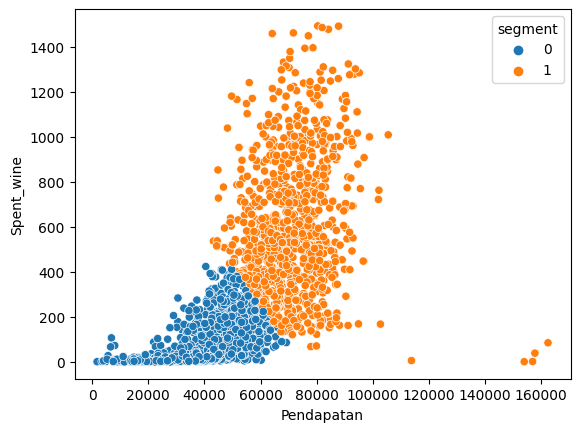

In [ ]:
sns.scatterplot(y=resultswine['Spent_wine'],x=resultswine['Pendapatan'],hue="segment",data=resultswine)

<Axes: xlabel='Pendapatan', ylabel='Spent_buah'>

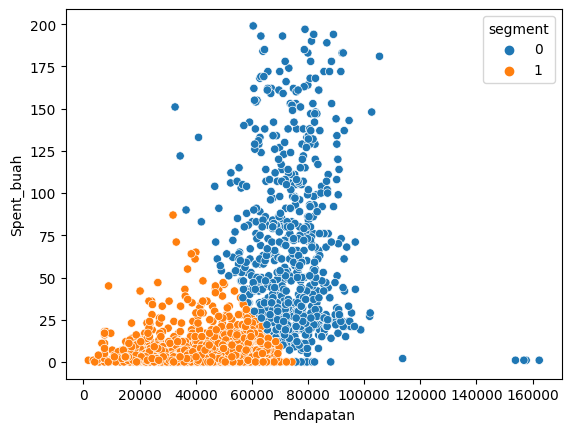

In [ ]:
sns.scatterplot(y=resultsbuah['Spent_buah'],x=resultsbuah['Pendapatan'],hue="segment",data=resultsbuah)

<Axes: xlabel='Pendapatan', ylabel='Spent_daging'>

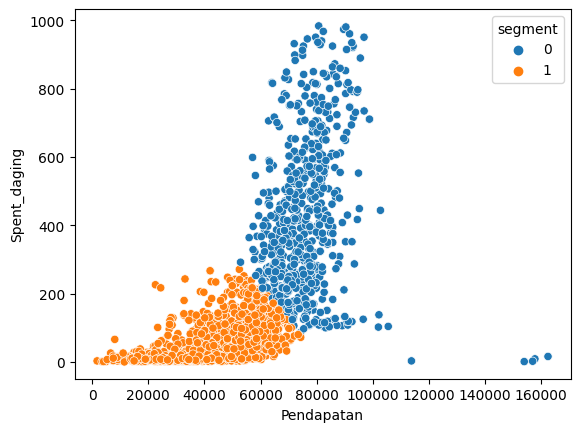

In [ ]:
sns.scatterplot(y=resultsdaging['Spent_daging'],x=resultsdaging['Pendapatan'],hue="segment",data=resultsdaging)

<Axes: xlabel='Pendapatan', ylabel='Spent_ikan'>

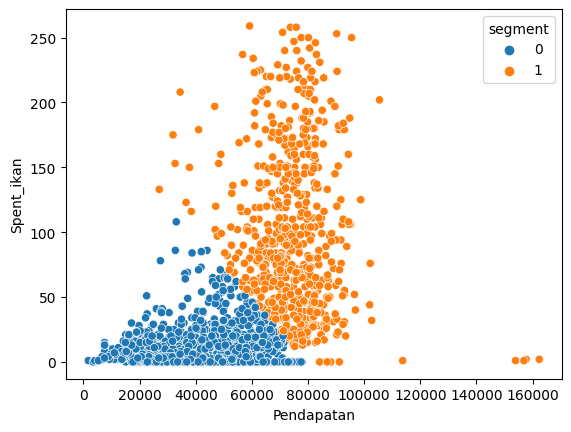

In [ ]:
sns.scatterplot(y=resultsikan['Spent_ikan'],x=resultsikan['Pendapatan'],hue="segment",data=resultsikan)

<Axes: xlabel='Pendapatan', ylabel='Spent_emas'>

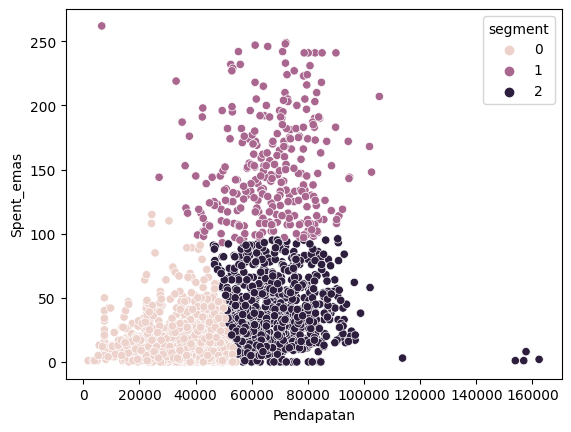

In [ ]:
sns.scatterplot(y=resultsemas['Spent_emas'],x=resultsemas['Pendapatan'],hue="segment",data=resultsemas)

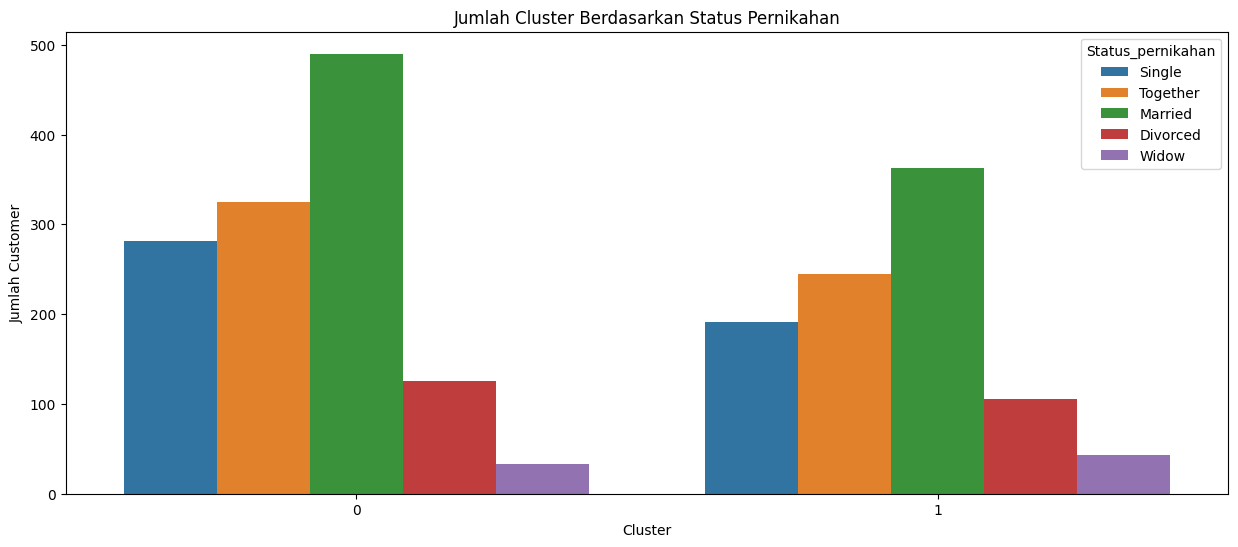

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultswine['segment'], data=resultswine, hue="Status_pernikahan")
plt.title("Jumlah Cluster Berdasarkan Status Pernikahan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

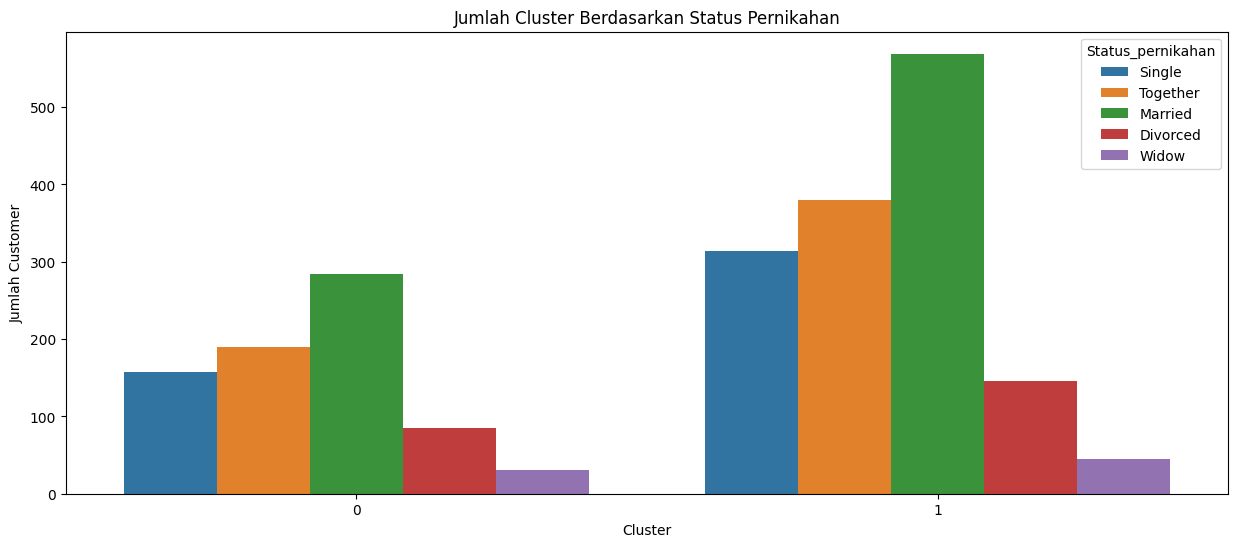

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsbuah['segment'], data=resultsbuah, hue="Status_pernikahan")
plt.title("Jumlah Cluster Berdasarkan Status Pernikahan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

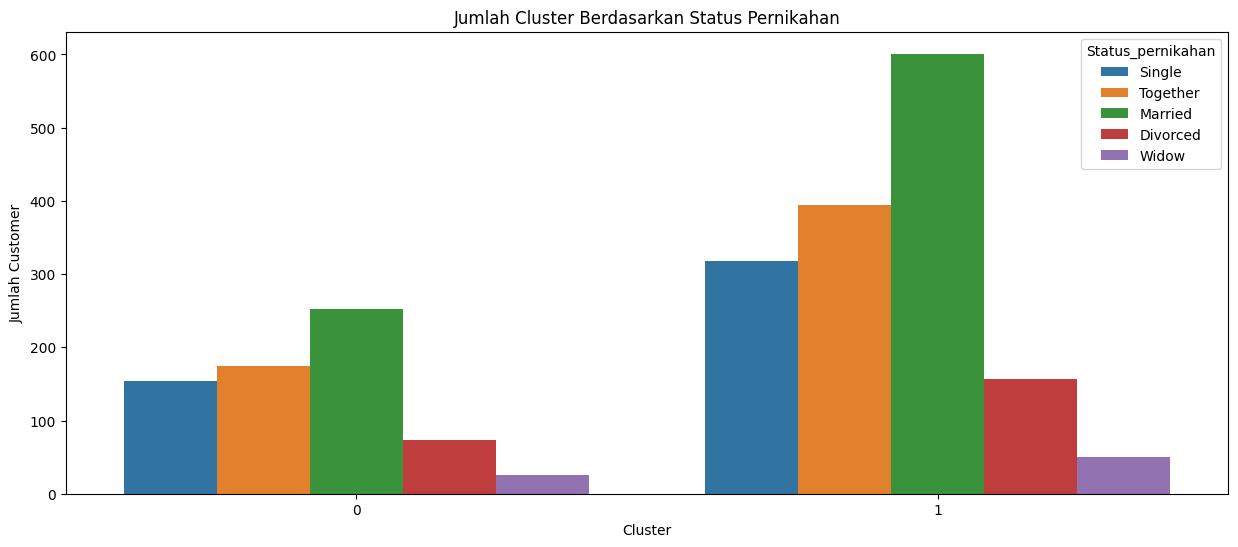

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsdaging['segment'], data=resultsdaging, hue="Status_pernikahan")
plt.title("Jumlah Cluster Berdasarkan Status Pernikahan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

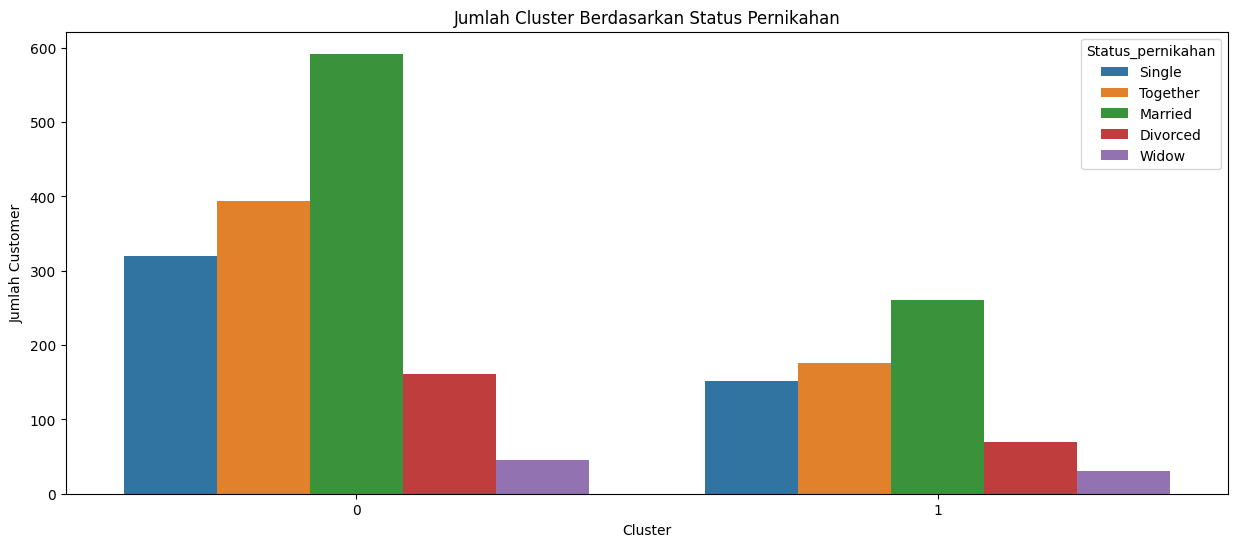

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsikan['segment'], data=resultsikan, hue="Status_pernikahan")
plt.title("Jumlah Cluster Berdasarkan Status Pernikahan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

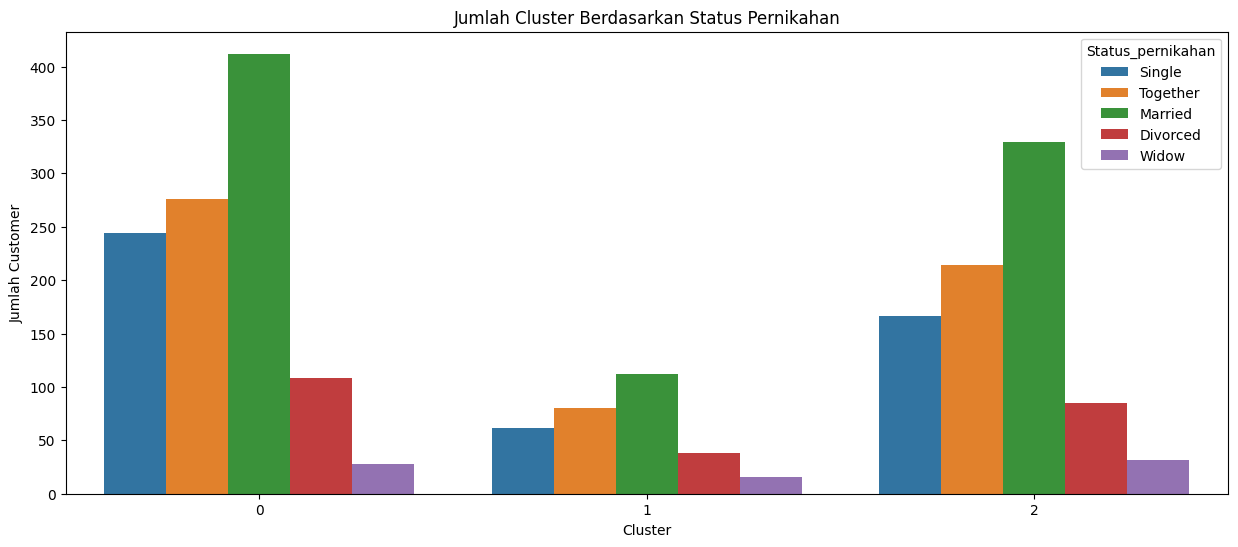

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsemas['segment'], data=resultsemas, hue="Status_pernikahan")
plt.title("Jumlah Cluster Berdasarkan Status Pernikahan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

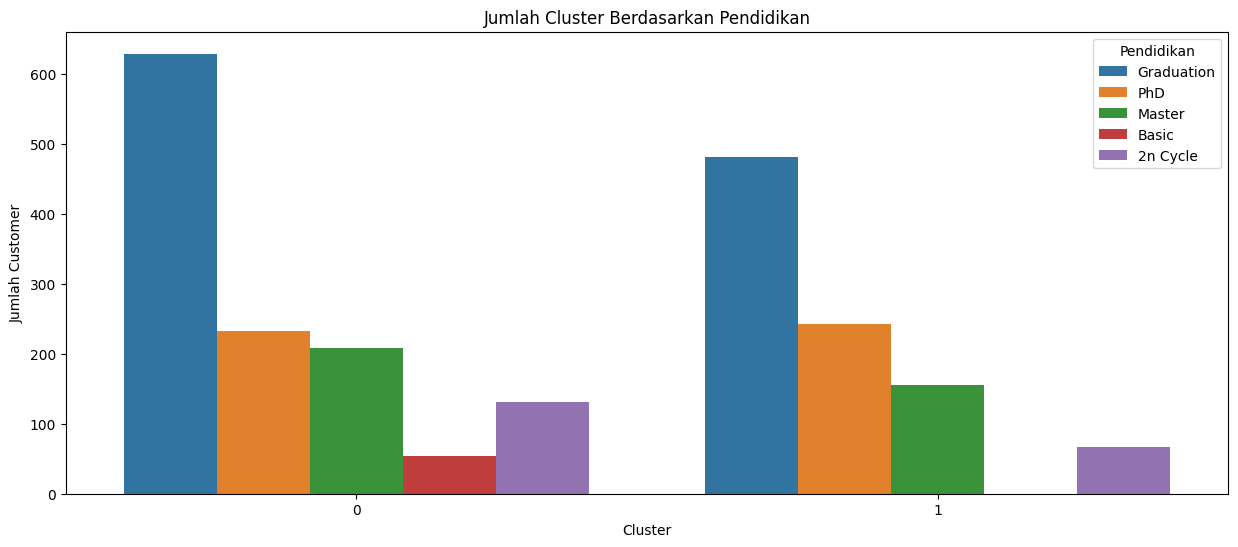

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultswine['segment'], data=resultswine, hue="Pendidikan")
plt.title("Jumlah Cluster Berdasarkan Pendidikan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

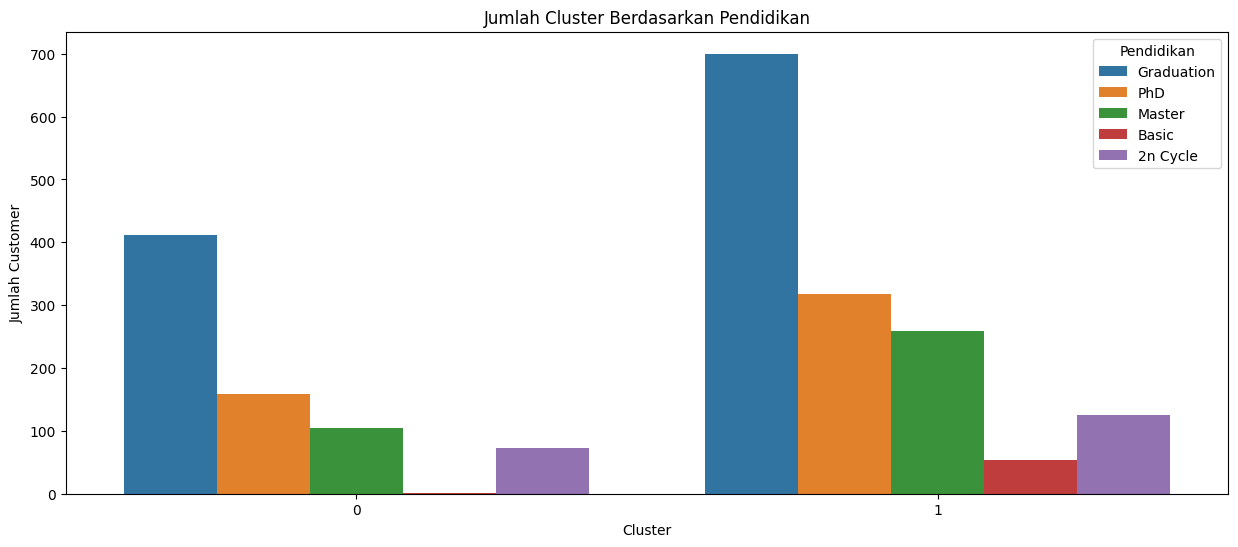

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsbuah['segment'], data=resultsbuah, hue="Pendidikan")
plt.title("Jumlah Cluster Berdasarkan Pendidikan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

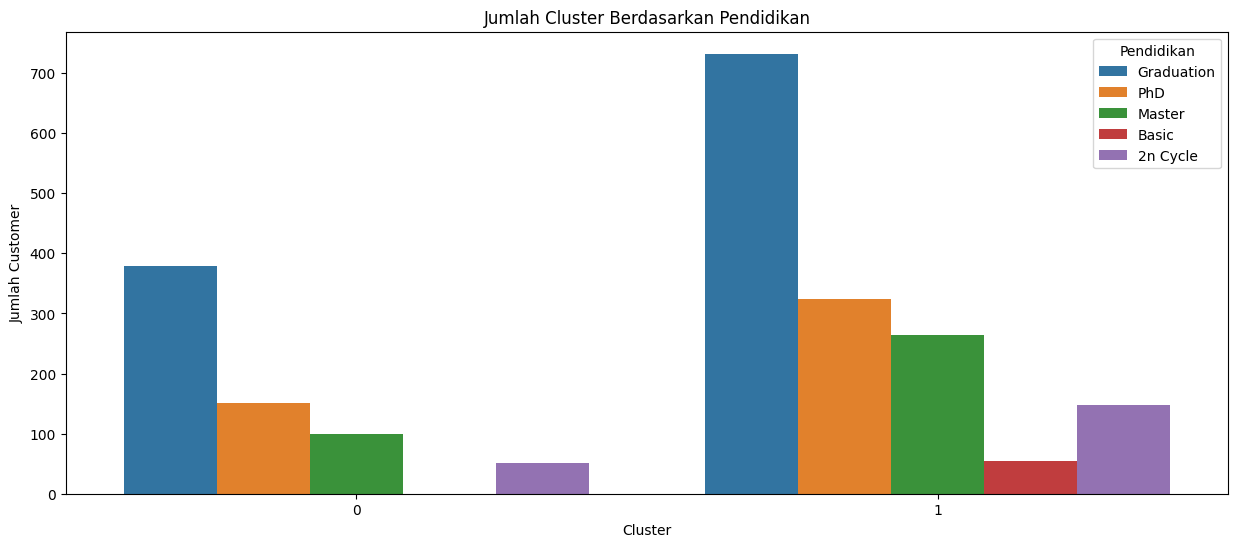

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsdaging['segment'], data=resultsdaging, hue="Pendidikan")
plt.title("Jumlah Cluster Berdasarkan Pendidikan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

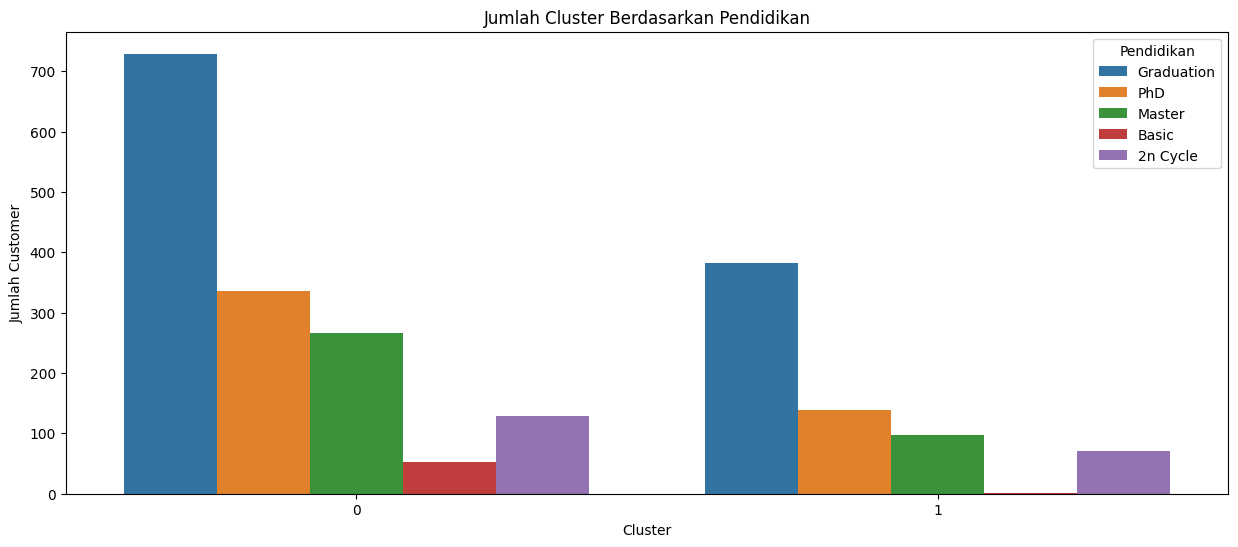

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsikan['segment'], data=resultsikan, hue="Pendidikan")
plt.title("Jumlah Cluster Berdasarkan Pendidikan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

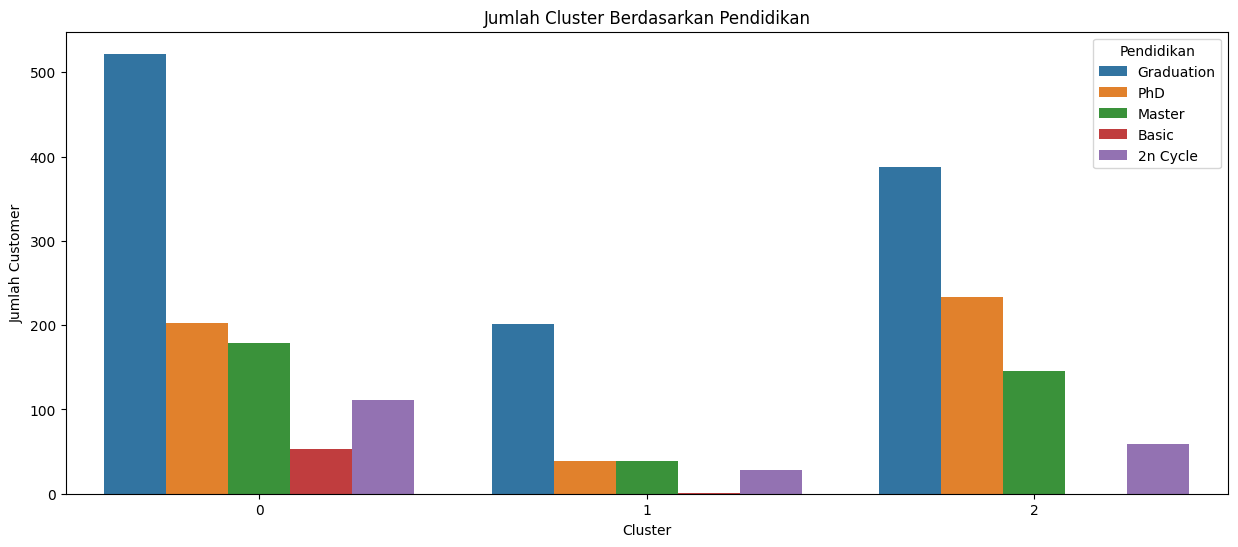

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=resultsemas['segment'], data=resultsemas, hue="Pendidikan")
plt.title("Jumlah Cluster Berdasarkan Pendidikan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

### KESIMPULAN/SARAN

Penjelasan tiap cluster

#### Cluster Wine
- Segment 0 : adalah segment yang memiliki pendapatan rendah atau memiliki spending terhadap buah yang juga rendah dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation

- Segment 1 : adalah segment yang memiliki pendapatan tinggi atau memiliki spending terhadap buah yang juga tinggi dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation

#### Cluster Buah
- Segment 0 : adalah segment yang memiliki pendapatan rendah atau memiliki spending terhadap buah yang juga rendah dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation
- Segment 1 : adalah segment yang memiliki pendapatan tinggi atau memiliki spending terhadap buah yang juga tinggi dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation

#### Cluster Daging
- Segment 0 : adalah segment yang memiliki pendapatan tinggi atau memiliki spending terhadap buah yang juga tinggi dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation
- Segment 1 : adalah segment yang memiliki pendapatan rendah atau memiliki spending terhadap buah yang juga rendah dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation

#### Cluster Ikan
- Segment 0 : adalah segment yang memiliki pendapatan rendah atau memiliki spending terhadap buah yang juga rendah dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation
- Segment 1 : adalah segment yang memiliki pendapatan tinggi atau memiliki spending terhadap buah yang juga tinggi dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation

#### Cluster Emas
- Segment 0 : adalah segment yang memiliki pendapatan rata rata serta dengan spending emas tertinggi dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation
- Segment 1 : adalah segment yang memiliki pendapatan rendah serta spending terhadap emas yang rendah dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation
- Segment 2 : adalah segment yang memiliki pendapatan tertinggi tetapi dengan spending emas yang rendah dengan status pernikahan paling banyak menikah,beserta pendidikan paling banyak di graduation